# 1. 비즈니스 목표
목표 : 
유저의 행동 데이터를 분석해 **GMV(Gross Merchandise Value)** 상승 방안을 도출하고, 매출 향상에 기여할 수 있는 핵심 KPI와 개선 포인트를 찾는다.

# 2. 사용할 데이터
- 캐글 이커머스 웹로그 데이터셋를 축소함 (전체 데이터셋의 양이 너무 커서 '2019년 10월' 한 달간의 데이터만 사용)
- 유저, 이벤트, 페이지, 이벤트 시각 등의 정보가 들어 있음
- 유저의 행동 경로를 파악하여 최종 목표(결제 등)까지 도달하는 과정에서의 개선점을 도출할 수 있음
- 전체 데이터
https://www.kaggle.com/datasets/mkechinov/ecommerce-behavior-data-from-multi-category-store

In [1]:
import pandas as pd

data = pd.read_csv('./web_log_data.csv')

In [2]:
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:15,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
2,2019-10-01 00:00:23,view,1004739,2053013555631882655,electronics.smartphone,xiaomi,197.55,519530528,9882d21f-2c5f-496b-90d4-a1503edb6562
3,2019-10-01 00:00:25,view,19001139,2053013557225718275,NaN,gran-stone,67.58,525734504,83f584ed-c7f7-442e-8ae9-713cb27fdece
4,2019-10-01 00:00:41,view,1003141,2053013555631882655,electronics.smartphone,apple,382.97,551377651,ca11a570-47da-4630-898b-9a03127703da


- event_time: 이벤트가 발생한 시각
- event_type: 이벤트 종류
    - view: 상품을 조회
    - cart: 상품을 카트에 추가
    - remove_from_cart: 상품을 카트에서 제거
    - purchase: 구매
- product_id: 상품번호
- category_id: 카테고리번호
- category_code: 카테고리명
- brand: 브랜드명
- price: 상품 가격
- user_id: 고객번호
- user_session: 세션

## 데이터 전처리

In [4]:
# 데이터 살펴보기
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6610750 entries, 0 to 6610749
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 453.9+ MB


In [5]:
# 데이터 타입 변경
data['event_time'] = pd.to_datetime(data['event_time'], format='%Y-%m-%d %H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6610750 entries, 0 to 6610749
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   event_time     datetime64[ns]
 1   event_type     object        
 2   product_id     int64         
 3   category_id    int64         
 4   category_code  object        
 5   brand          object        
 6   price          float64       
 7   user_id        int64         
 8   user_session   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 453.9+ MB


In [6]:
# 결측치 확인 및 제거
display(data.isna().sum())

# 카테고리나 브랜드 정보로 분석할 계획은 X
data.drop(['category_id', 'category_code', 'brand'], axis=1, inplace=True)
display(data.head())


event_time             0
event_type             0
product_id             0
category_id            0
category_code    2152844
brand            1071029
price                  0
user_id                0
user_session           0
dtype: int64

,event_time,event_type,product_id,price,user_id,user_session
0,2019-10-01 00:00:00,view,44600062,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:15,view,44600062,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
2,2019-10-01 00:00:23,view,1004739,197.55,519530528,9882d21f-2c5f-496b-90d4-a1503edb6562
3,2019-10-01 00:00:25,view,19001139,67.58,525734504,83f584ed-c7f7-442e-8ae9-713cb27fdece
4,2019-10-01 00:00:41,view,1003141,382.97,551377651,ca11a570-47da-4630-898b-9a03127703da


In [7]:
#  날짜 컬럼 추가
data['date_ymd'] = data['event_time'].dt.date
data.head()

,event_time,event_type,product_id,price,user_id,user_session,date_ymd
0,2019-10-01 00:00:00,view,44600062,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c,2019-10-01
1,2019-10-01 00:00:15,view,44600062,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c,2019-10-01
2,2019-10-01 00:00:23,view,1004739,197.55,519530528,9882d21f-2c5f-496b-90d4-a1503edb6562,2019-10-01
3,2019-10-01 00:00:25,view,19001139,67.58,525734504,83f584ed-c7f7-442e-8ae9-713cb27fdece,2019-10-01
4,2019-10-01 00:00:41,view,1003141,382.97,551377651,ca11a570-47da-4630-898b-9a03127703da,2019-10-01


# 3. 데이터 분석

## KPI 설정 및 분석
### DAU, MAU
우리 서비스에 몇명이나 접속하고 유저수가 얼마나 성장하고 있는지 트래킹할 때 사용하는 기본적인 지표

- DAU : 일간 활성 사용자수
- MAU : 월간 활성 사용자수

In [9]:
dau = data.groupby('date_ymd')[['user_id']].nunique().reset_index()
dau.columns = ['date_ymd', 'dau']
display(dau.head())

,date_ymd,dau
0,2019-10-01,12799
1,2019-10-02,13074
2,2019-10-03,12977
3,2019-10-04,15907
4,2019-10-05,14282


In [10]:
data['month'] = data['event_time'].dt.month
mau = data.groupby(['month'])[['user_id']].nunique().reset_index()
mau.columns = ['month', 'mau']
mau

,month,mau
0,10,91653


-> 10월 한 달간의 데이터만 사용하므로 mau보다 dau지표를 확인하는 것이 유의미할 것이다.

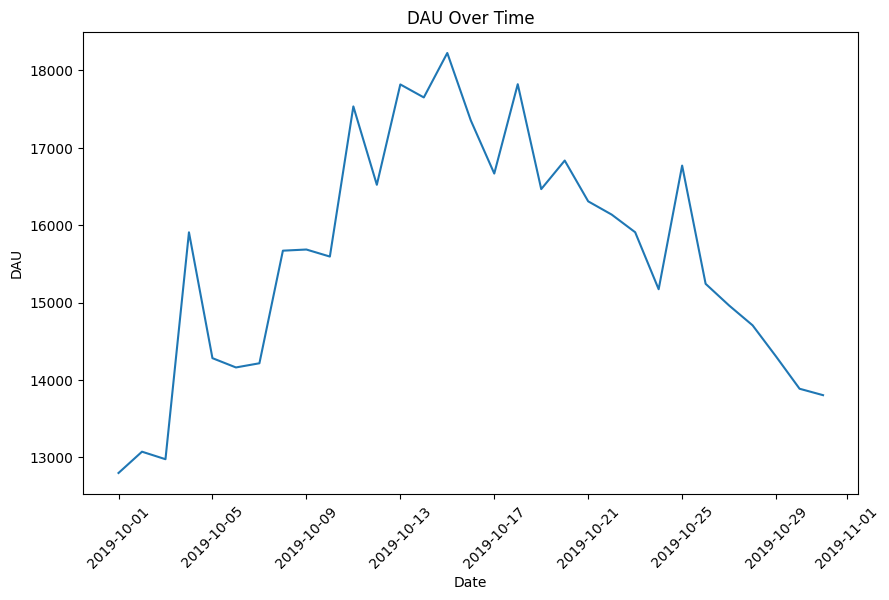

In [12]:
# 날짜별 DAU 그래프 시각화

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(x='date_ymd', y='dau', data=dau)
plt.title('DAU Over Time')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('DAU')
plt.show()

### 체류시간
- 웹페이지에 체류하고 있는 시간
- 세션별로 MAX 시각과 MIN 시각의 차이로 계산

결제창에서 체류시간이 길면 결제 안하고 떠날 확률이 높고, 첫 방문 시 체류시간 너무 짧으면 이탈할 확률이 높을 것이다.

In [13]:
duration = data.groupby(['user_id', 'user_session', 'date_ymd'])['event_time'].agg(['min', 'max']).reset_index()
duration.head() 

,user_id,user_session,date_ymd,min,max
0,266287781,118dbcd6-fe31-4cc9-bf87-1e592124f4ee,2019-10-25,2019-10-25 03:52:09,2019-10-25 03:52:09
1,266287781,32023c94-c676-455b-8713-4dad692e609d,2019-10-25,2019-10-25 03:52:55,2019-10-25 03:52:55
2,266287781,56f6e473-53b1-4735-b2a2-e853ee391ba2,2019-10-28,2019-10-28 11:55:55,2019-10-28 11:55:55
3,266287781,992d03b4-c561-4fba-a0d8-c03886452884,2019-10-26,2019-10-26 12:15:56,2019-10-26 12:22:55
4,266287781,9ca89901-1b2c-4278-9890-5b576e9b07ca,2019-10-25,2019-10-25 03:50:49,2019-10-25 03:50:49


In [14]:
duration['duration'] = (duration['max'] - duration['min']).dt.total_seconds()
duration.head()

,user_id,user_session,date_ymd,min,max,duration
0,266287781,118dbcd6-fe31-4cc9-bf87-1e592124f4ee,2019-10-25,2019-10-25 03:52:09,2019-10-25 03:52:09,0.0
1,266287781,32023c94-c676-455b-8713-4dad692e609d,2019-10-25,2019-10-25 03:52:55,2019-10-25 03:52:55,0.0
2,266287781,56f6e473-53b1-4735-b2a2-e853ee391ba2,2019-10-28,2019-10-28 11:55:55,2019-10-28 11:55:55,0.0
3,266287781,992d03b4-c561-4fba-a0d8-c03886452884,2019-10-26,2019-10-26 12:15:56,2019-10-26 12:22:55,419.0
4,266287781,9ca89901-1b2c-4278-9890-5b576e9b07ca,2019-10-25,2019-10-25 03:50:49,2019-10-25 03:50:49,0.0


In [15]:
# 날짜별 평균 체류시간 계산
duration_mean = duration.groupby('date_ymd')['duration'].mean().reset_index()
duration_mean.head()

,date_ymd,duration
0,2019-10-01,497.343132
1,2019-10-02,484.670291
2,2019-10-03,495.753052
3,2019-10-04,496.113484
4,2019-10-05,532.591555


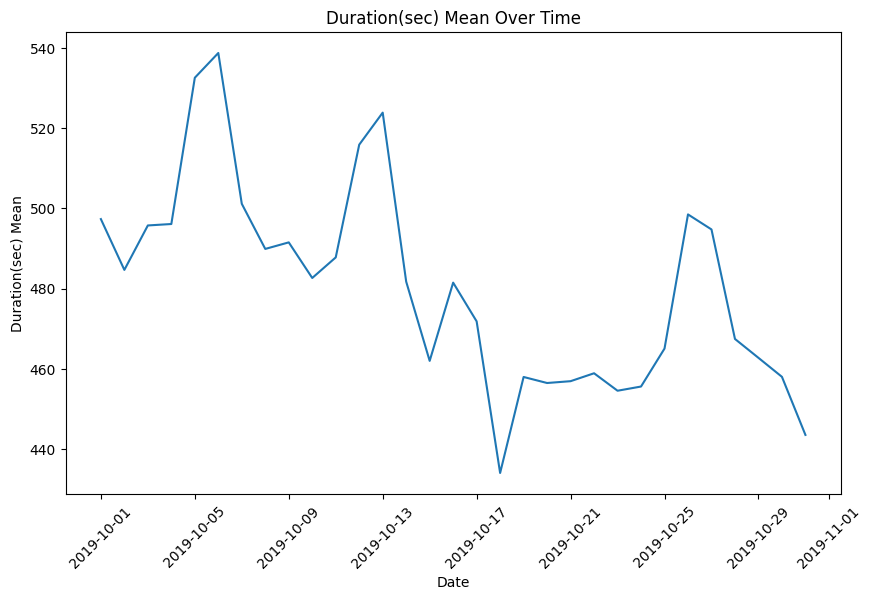

In [16]:
# 날짜별 체류시간 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(x='date_ymd', y='duration', data=duration_mean)
plt.title('Duration(sec) Mean Over Time')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Duration(sec) Mean')
plt.show()

### 전환율, GMV
#### GMV = DAU * 인당 상품조회수 * 구매전환율 * 상품주문단가
- 인당 상품조회수 = 상품조회수 / DAU
- 구매전환율 = 상품주문수 / 상품조회수
- 상품주문단가 = GMV / 상품주문수

In [17]:
result = data.groupby('date_ymd').agg(
    dau=('user_id', 'nunique'),
    view_count=('event_type', lambda x: (x == 'view').sum()),
    purchase_count=('event_type', lambda x: (x == 'purchase').sum()),
    gmv=('price', lambda x: x[data['event_type'] == 'purchase'].sum()),
).reset_index()

result['avg_view_per_user'] = result['view_count'] / result['dau']
result['conversion_rate'] = result['purchase_count'] / result['view_count']
result['avg_purchase_price'] = result['gmv'] / result['purchase_count']

result = result.fillna(0)

result.head()

,date_ymd,dau,view_count,purchase_count,gmv,avg_view_per_user,conversion_rate,avg_purchase_price
0,2019-10-01,12799,172221,2441,748890.62,13.455817,0.014174,306.796649
1,2019-10-02,13074,169059,2447,773641.23,12.930932,0.014474,316.159064
2,2019-10-03,12977,174081,2659,857984.08,13.414580,0.015274,322.671711
3,2019-10-04,15907,211866,3628,1123036.87,13.319042,0.017124,309.547098
4,2019-10-05,14282,199306,3258,1017097.86,13.955048,0.016347,312.184733


Text(0, 0.5, 'GMV')

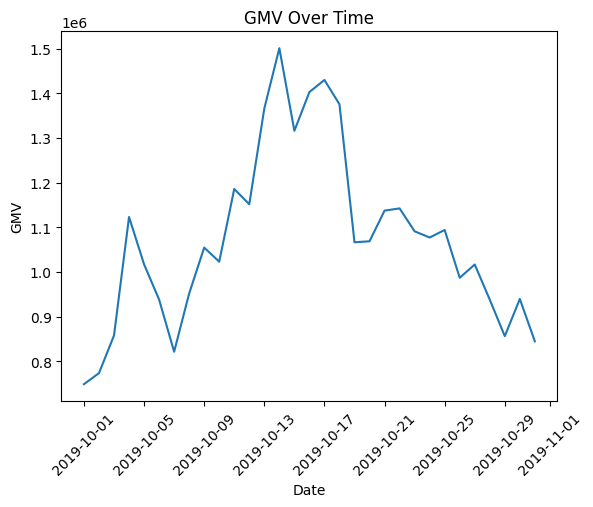

In [18]:
# 날짜별 GMV 시각화
sns.lineplot(x='date_ymd', y='gmv', data=result)
plt.title('GMV Over Time')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('GMV')

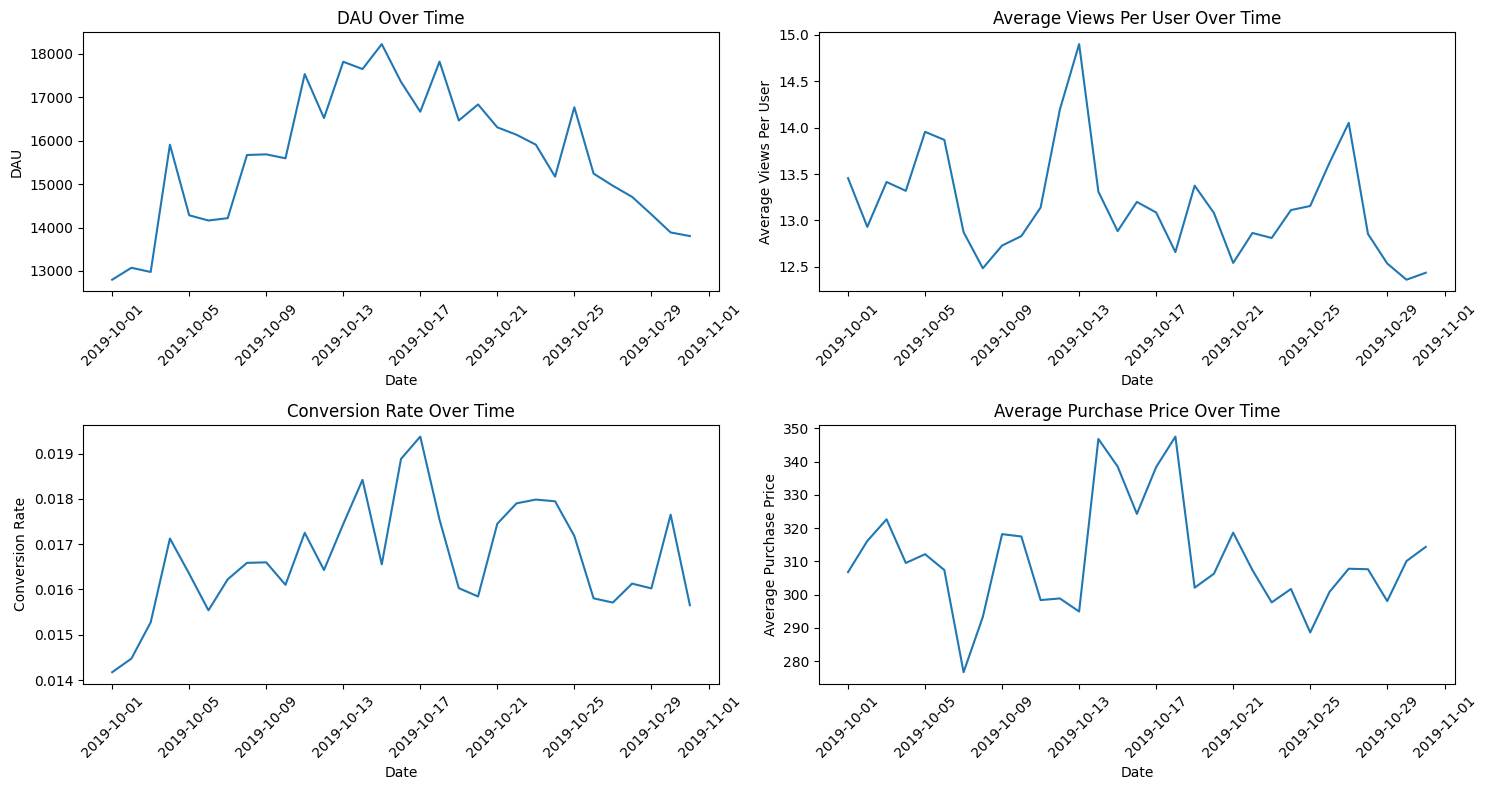

In [19]:
# DAU, 인당상품조회수, 전환율, 상품주문단가 시각화
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
sns.lineplot(x='date_ymd', y='dau', data=result)
plt.title('DAU Over Time')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('DAU')

plt.subplot(2, 2, 2)
sns.lineplot(x='date_ymd', y='avg_view_per_user', data=result)
plt.title('Average Views Per User Over Time')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Average Views Per User')

plt.subplot(2, 2, 3)
sns.lineplot(x='date_ymd', y='conversion_rate', data=result)
plt.title('Conversion Rate Over Time')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Conversion Rate')

plt.subplot(2, 2, 4)
sns.lineplot(x='date_ymd', y='avg_purchase_price', data=result)
plt.title('Average Purchase Price Over Time')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Average Purchase Price')

plt.tight_layout()
plt.show()

#### 결론

DAU, 구매전환율도 GMV처럼 처음에 낮았다가 올랐다가 다시 떨어짐.

반면, 인당상품조회수, 상품주문단가는 그 트렌드(흐름)에 따라가지 않음.

따라서 GMV를 좌지우지 하는 건 **DAU, 구매전환율** 로 확인됨.


## 퍼널 분석
고객들이 우리가 설계한 유저 경험 루트를 따라 잘 도착하고 있는지 확인해보기 위해 최초 유입부터 최종 목적지까지 단계를 나누어서 살펴보는 분석



In [20]:
# 상품조회(view), 장바구니(cart), 구매(purchase) 단계로 구성

total_view = len(data.query('event_type == "view"'))
total_cart = len(data.query('event_type == "cart"'))
total_purchase = len(data.query('event_type == "purchase"'))

funnel = pd.DataFrame({
    'event_type': ['View', 'Cart', 'Purchase'],
    'count': [total_view, total_cart, total_purchase],
    'rate': [(total_view/total_view), (total_cart/total_view), (total_purchase/total_view)]
})

display(funnel)

,event_type,count,rate
0,View,6379532,1.000000
1,Cart,124252,0.019477
2,Purchase,106966,0.016767


In [21]:
# 퍼널 시각화

import plotly.express as px

fig = px.funnel(data_frame=funnel, x='event_type', y='rate')
fig.update_traces(texttemplate="%{value:,.2%}")
fig.show()

#### 결론
cart -> purchase 까지는 대부분 잘 넘어감.

따라서, 우리는 view -> cart , 장바구니에 담기까지에 주안점을 두고 개선을 하려는 프로젝트를 진행해야 됨.

## 리텐션 분석
- 리텐션: 특정 기간이 지나도 유지되는 고객수
1. 코호트 리텐션
    - 코호트: 동질적인 특성을 공유하는 사람들의 집합
    - ex) 같은 시기에 처음 방문한 유저들, 나이가 같은 유저들, 특정 행동 한 유저들 등
    - 동일한 코호트끼리 리텐션을 비교

2. 리텐션 커브
    - 리텐션을 라인 차트로 시각화
    - 시간이 경과함에 따라 얼마나 retain 되는지를 직관적으로 파악

### 1. 코호트 리텐션

In [22]:
import sqlite3

conn = sqlite3.connect(":memory:")
data.to_sql('data', conn, index=False, if_exists='replace')

6610750

In [ ]:
query_retention_rate = """
WITH first_visit AS (
    SELECT user_id, MIN(date_ymd) AS first_visit_date
    FROM data
    GROUP BY user_id
),
retention_cohort AS (
    SELECT fv.user_id, fv.first_visit_date, d.date_ymd,
           CAST(JULIANDAY(d.date_ymd) - JULIANDAY(fv.first_visit_date) AS INT) AS days_since_first_visit
    FROM first_visit fv
    JOIN data d ON fv.user_id = d.user_id
),
daily_active_users AS (
    SELECT first_visit_date, days_since_first_visit, COUNT(DISTINCT user_id) AS retained_users
    FROM retention_cohort
    WHERE days_since_first_visit >= 0
    GROUP BY first_visit_date, days_since_first_visit
),
total_users AS (
    SELECT first_visit_date, COUNT(DISTINCT user_id) AS total_users_cohort
    FROM first_visit
    GROUP BY first_visit_date
)
SELECT dau.first_visit_date, dau.days_since_first_visit,
       dau.retained_users, tu.total_users_cohort,
       CAST(dau.retained_users AS REAL) / tu.total_users_cohort AS retention_rate
FROM daily_active_users dau
JOIN total_users tu ON dau.first_visit_date = tu.first_visit_date
ORDER BY dau.first_visit_date, dau.days_since_first_visit;
"""
retention_rate = pd.read_sql(query_retention_rate, conn)
retention_rate.head(5)

,first_visit_date,days_since_first_visit,retained_users,total_users_cohort,retention_rate
0,2019-10-01,0,12799,12799,1.000000
1,2019-10-01,1,4654,12799,0.363622
2,2019-10-01,2,4103,12799,0.320572
3,2019-10-01,3,4596,12799,0.359091
4,2019-10-01,4,4012,12799,0.313462


In [24]:
retention_pivot = retention_rate.pivot_table(
    index='first_visit_date',
    columns='days_since_first_visit',
    values='retention_rate',
    aggfunc='sum'
).fillna(0)

retention_pivot.head()

days_since_first_visit,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
first_visit_date,,,,,,,,,,,,,,,,,,,,,
2019-10-01,1.0,0.363622,0.320572,0.359091,0.313462,0.294242,0.291820,0.300648,0.291585,0.288538,...,0.242441,0.245957,0.236581,0.257051,0.227830,0.223377,0.230565,0.216658,0.213610,0.214548
2019-10-02,1.0,0.292518,0.310926,0.259857,0.248219,0.245487,0.245606,0.251544,0.249762,0.270903,...,0.211639,0.195962,0.221021,0.196318,0.190974,0.196556,0.186580,0.181116,0.180641,0.000000
2019-10-03,1.0,0.312744,0.233505,0.221806,0.225550,0.229449,0.218531,0.220870,0.242396,0.227266,...,0.189362,0.204960,0.178131,0.184371,0.180003,0.180315,0.170800,0.163937,0.000000,0.000000
2019-10-04,1.0,0.263606,0.212769,0.196770,0.203050,0.208134,0.203200,0.225478,0.210377,0.239085,...,0.194378,0.170604,0.166567,0.162679,0.153110,0.147578,0.149970,0.000000,0.000000,0.000000
2019-10-05,1.0,0.254251,0.202820,0.194110,0.186852,0.182912,0.212982,0.198673,0.215886,0.188304,...,0.165906,0.161344,0.135836,0.147449,0.142265,0.137287,0.000000,0.000000,0.000000,0.000000


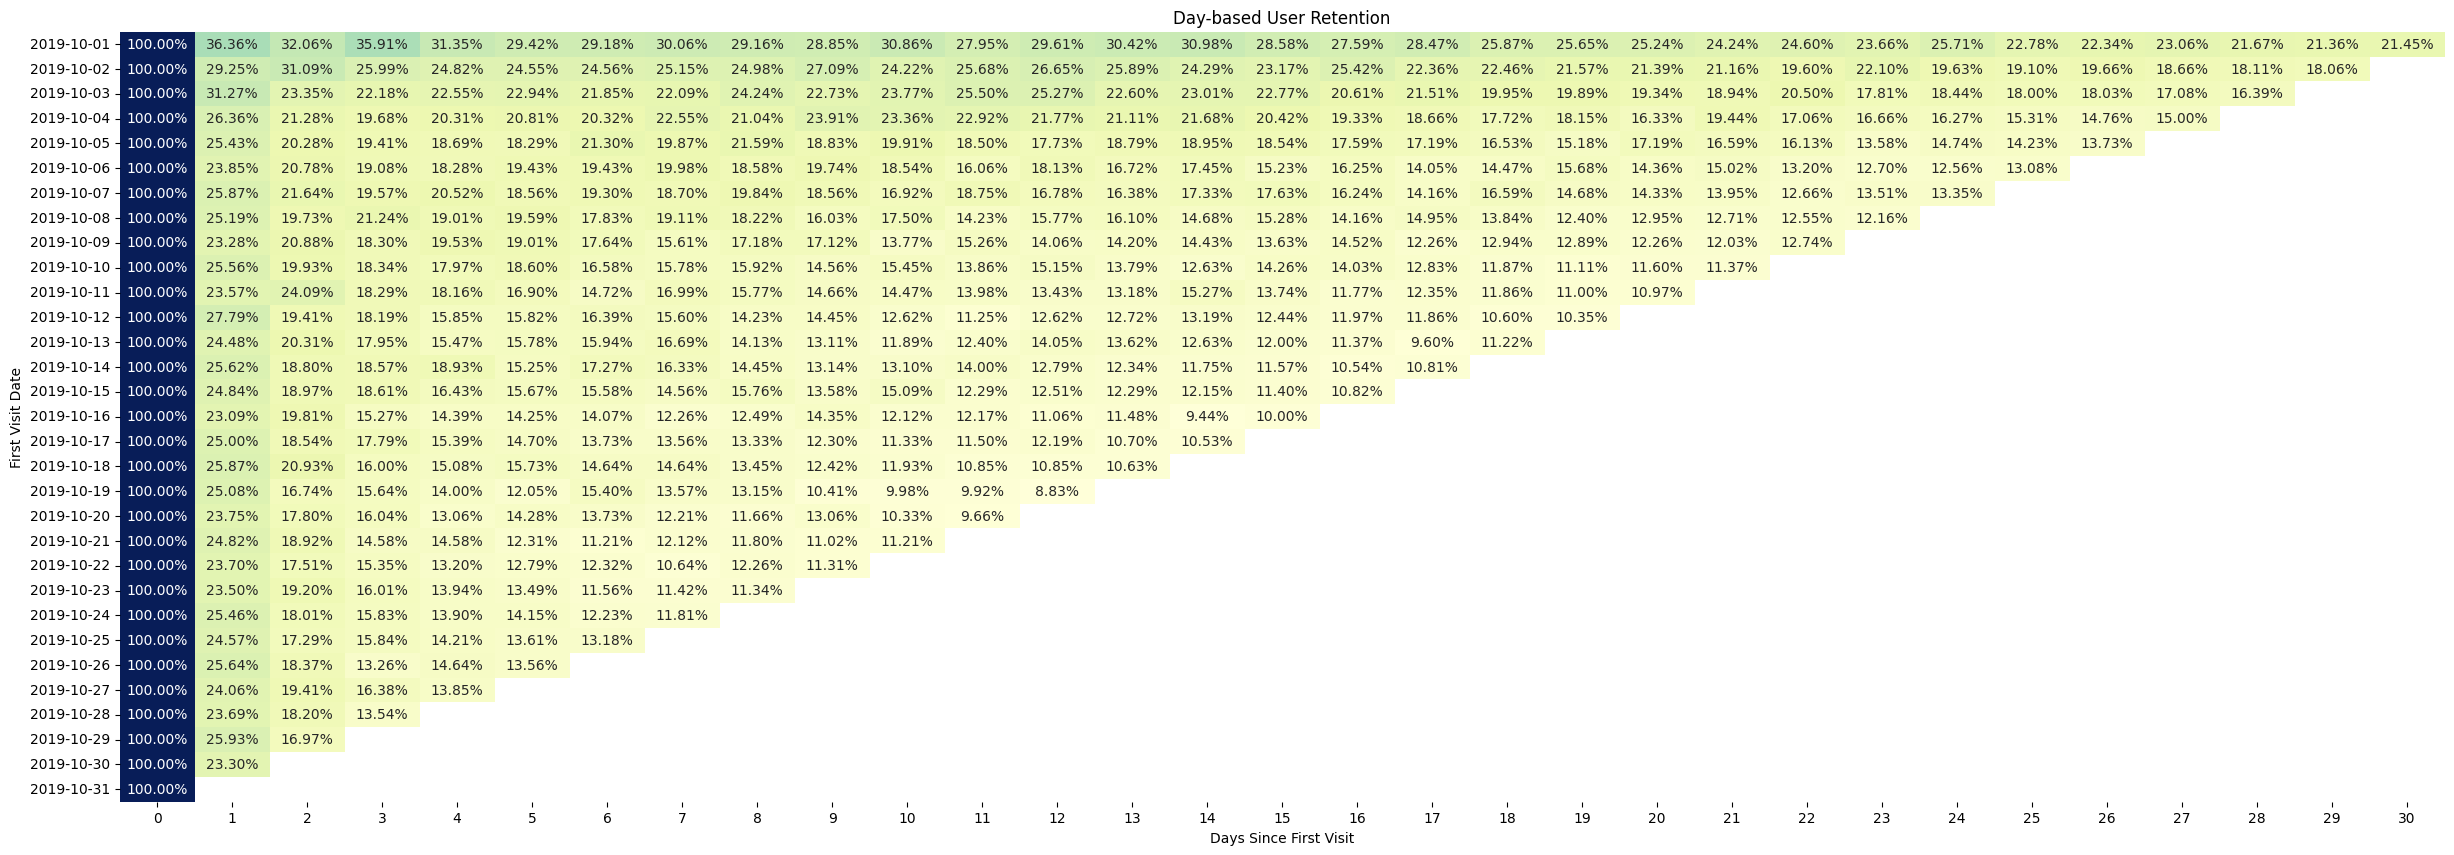

In [25]:
# 코호트 리텐션 시각화
## 첫 번째 방문 날짜를 기준으로 리텐션을 계산하고, 각 날짜별로 몇 퍼센트의 유저가 유지되는지 시각화
plt.figure(figsize=(30, 10))
sns.heatmap(retention_pivot, annot=True, fmt=".2%", cmap="YlGnBu", cbar=False, mask=(retention_pivot == 0))
plt.title("Day-based User Retention")
plt.xlabel("Days Since First Visit")
plt.ylabel("First Visit Date")
plt.show()

### 2. 리텐션 커브

,days_since_first_visit,retention_rate
0,0,1.000000
1,1,0.255395
2,2,0.203548
3,3,0.183153
4,4,0.173372
5,5,0.169837
6,6,0.167992
7,7,0.167204
8,8,0.167196
9,9,0.164192


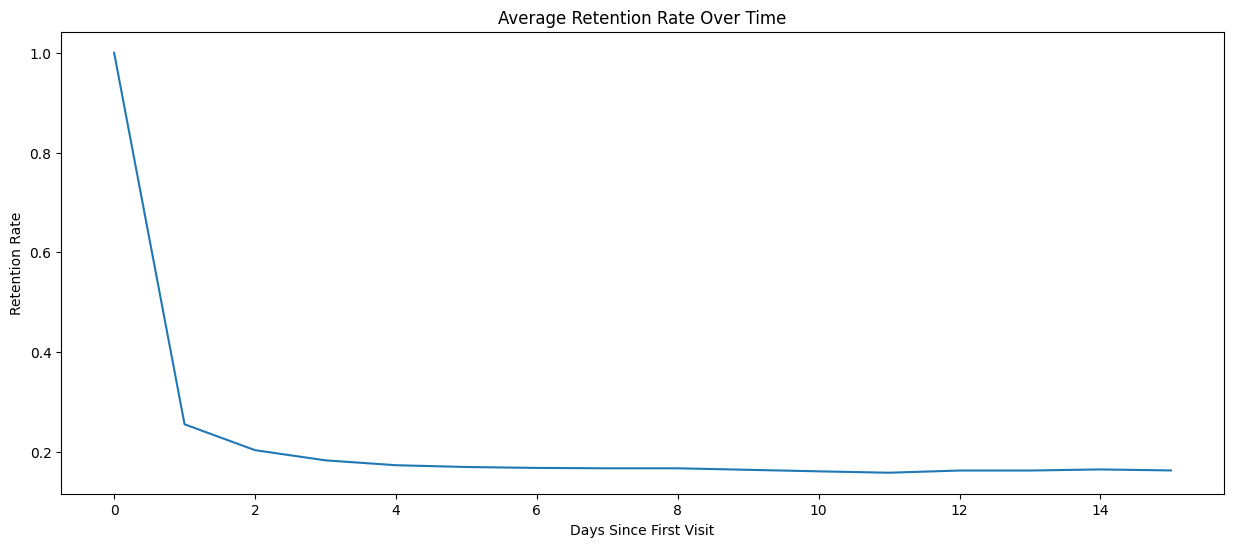

In [26]:
# 한달치 데이터만 가지고 있어서 15일 이후는 평균을 냈을때 
# 너무 적은 수(충분하지 못한 데이터량)만 들어 있어서 15일까지로 범위 제한

retention_avg = retention_rate.query('days_since_first_visit <= 15').groupby('days_since_first_visit')['retention_rate'].mean().reset_index() 

display(retention_avg)

plt.figure(figsize=(15, 6))
sns.lineplot(x='days_since_first_visit', y='retention_rate', data=retention_avg)
plt.title('Average Retention Rate Over Time')
plt.xlabel('Days Since First Visit')
plt.ylabel('Retention Rate')
plt.show()

In [27]:

day1_retention = retention_rate.query('days_since_first_visit==1')[['first_visit_date', 'retention_rate']]
display(day1_retention.head())

day3_retention = retention_rate.query('days_since_first_visit==3')[['first_visit_date', 'retention_rate']]
display(day3_retention.head())

day7_retention = retention_rate.query('days_since_first_visit==7')[['first_visit_date', 'retention_rate']]
display(day7_retention.head())

,first_visit_date,retention_rate
1,2019-10-01,0.363622
32,2019-10-02,0.292518
62,2019-10-03,0.312744
91,2019-10-04,0.263606
119,2019-10-05,0.254251


,first_visit_date,retention_rate
3,2019-10-01,0.359091
34,2019-10-02,0.259857
64,2019-10-03,0.221806
93,2019-10-04,0.196770
121,2019-10-05,0.194110


,first_visit_date,retention_rate
7,2019-10-01,0.300648
38,2019-10-02,0.251544
68,2019-10-03,0.220870
97,2019-10-04,0.225478
125,2019-10-05,0.198673


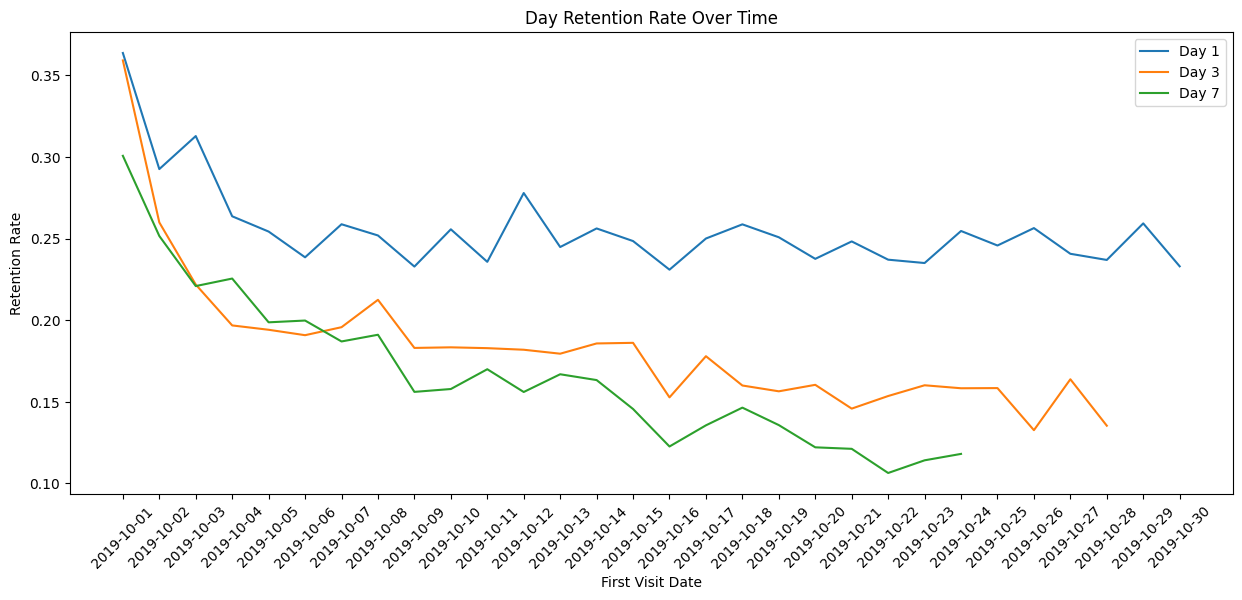

In [28]:
# 첫 방문 날짜별로 1일, 3일, 7일 리텐션을 시각화
# ex) 파란색 그래프 : 첫 방문 일자 별로 1일 지났을 때 리텐션이 어떻게 나타나는지

day1_retention = retention_rate[retention_rate['days_since_first_visit'] == 1][
    ['first_visit_date', 'retention_rate']
]
day3_retention = retention_rate[retention_rate['days_since_first_visit'] == 3][
    ['first_visit_date', 'retention_rate']
]
day7_retention = retention_rate[retention_rate['days_since_first_visit'] == 7][
    ['first_visit_date', 'retention_rate']
]

plt.figure(figsize=(15, 6))
sns.lineplot(x='first_visit_date', y='retention_rate', data=day1_retention, label='Day 1')
sns.lineplot(x='first_visit_date', y='retention_rate', data=day3_retention, label='Day 3')
sns.lineplot(x='first_visit_date', y='retention_rate', data=day7_retention, label='Day 7')
plt.title('Day Retention Rate Over Time')
plt.legend()
plt.xlabel('First Visit Date')
plt.ylabel('Retention Rate')
plt.xticks(rotation=45)
plt.show()

#### 결론 
첫 방문일이 늦을수록, 그리고, 첫 방문 일자 이후 시간이 지날수록 리텐션이 떨어진다.



#### 가설 설정

비교적 최근에 첫 방문한 리텐션이 초반에 방문한 리텐션보다 낮음. 이거 개선해야됨. 뭐가 문제인지 알기 위해, 코호트를 좀 더 쪼개보자 

**가설 : 처음 방문한 날에 상품조회수가 높을수록 리텐션 올라가고 적을수록 리텐션 떨어질 것이다.**

이 가설이 맞다면 첫 방문일에 최대한 상품을 많이 조회할 수 있도록 하는 액션으로 전략 방향 세움 

In [30]:
# 코호트를 조회수 구간 별로 나누어서 리텐션 분석
# a그룹 : 조회수 0~5
# b그룹 : 조회수 6~10
# c그룹 : 조회수 11~30
# d그룹 : 조회수 31~

query_cohort_retention = """
WITH first_visit AS (
    SELECT user_id, MIN(date_ymd) AS first_visit_date
    FROM data
    WHERE event_type = 'view'
    GROUP BY user_id
),
first_visit_with_views AS (
    SELECT d.user_id
        , first_visit_date
        , CASE WHEN COUNT(d.user_id) >= 0 AND COUNT(d.user_id) <= 5 THEN 'a. 0~5'
            WHEN COUNT(d.user_id) >= 6 AND COUNT(d.user_id) <= 10 THEN 'b. 6~10'
            WHEN COUNT(d.user_id) >= 11 AND COUNT(d.user_id) <= 30 THEN 'c. 11~30'
            WHEN COUNT(d.user_id) >= 31 THEN 'd. 31~'
            ELSE NULL END AS views
    FROM data d
    JOIN first_visit fv ON d.user_id = fv.user_id AND d.date_ymd = fv.first_visit_date
    WHERE d.event_type = 'view'
    GROUP BY d.user_id, first_visit_date
),
retention_cohort AS (
    SELECT fv.user_id, fv.first_visit_date, fv.views, d.date_ymd,
           CAST(JULIANDAY(d.date_ymd) - JULIANDAY(fv.first_visit_date) AS INT) AS days_since_first_visit
    FROM first_visit_with_views fv
    JOIN data d ON fv.user_id = d.user_id
),
daily_active_users AS (
    SELECT first_visit_date, views, days_since_first_visit, COUNT(DISTINCT user_id) AS retained_users
    FROM retention_cohort
    WHERE days_since_first_visit >= 0
    GROUP BY first_visit_date, views, days_since_first_visit
),
total_users AS (
    SELECT first_visit_date, views, COUNT(DISTINCT user_id) AS total_users_cohort
    FROM first_visit_with_views
    GROUP BY first_visit_date, views
)
SELECT dau.first_visit_date, dau.views, dau.days_since_first_visit,
       dau.retained_users, tu.total_users_cohort,
       CAST(dau.retained_users AS REAL) / tu.total_users_cohort AS retention_rate
FROM daily_active_users dau
JOIN total_users tu ON dau.first_visit_date = tu.first_visit_date AND dau.views = tu.views
ORDER BY dau.first_visit_date, dau.views, dau.days_since_first_visit;
"""
cohort_retention_rate = pd.read_sql(query_cohort_retention, conn)
cohort_retention_rate.head(20)

,first_visit_date,views,days_since_first_visit,retained_users,total_users_cohort,retention_rate
0,2019-10-01,a. 0~5,0,5711,5711,1.000000
1,2019-10-01,a. 0~5,1,1698,5711,0.297321
2,2019-10-01,a. 0~5,2,1571,5711,0.275083
3,2019-10-01,a. 0~5,3,1870,5711,0.327438
4,2019-10-01,a. 0~5,4,1669,5711,0.292243
5,2019-10-01,a. 0~5,5,1580,5711,0.276659
6,2019-10-01,a. 0~5,6,1547,5711,0.270881
7,2019-10-01,a. 0~5,7,1629,5711,0.285239
8,2019-10-01,a. 0~5,8,1553,5711,0.271931
9,2019-10-01,a. 0~5,9,1550,5711,0.271406


In [31]:
cohort_retention_pivot = cohort_retention_rate.pivot_table(
    index=['views', 'first_visit_date'],
    columns='days_since_first_visit',
    values='retention_rate',
    aggfunc='sum'
).fillna(0)

cohort_retention_pivot.head()

days_since_first_visit    0         1         2         3         4   \
views  first_visit_date                                                
a. 0~5 2019-10-01        1.0  0.297321  0.275083  0.327438  0.292243   
       2019-10-02        1.0  0.245873  0.289973  0.245873  0.242917   
       2019-10-03        1.0  0.279704  0.211377  0.197577  0.210703   
       2019-10-04        1.0  0.219763  0.197319  0.178616  0.193267   
       2019-10-05        1.0  0.204692  0.182613  0.180313  0.187672   

days_since_first_visit         5         6         7         8         9   \
views  first_visit_date                                                     
a. 0~5 2019-10-01        0.276659  0.270881  0.285239  0.271931  0.271406   
       2019-10-02        0.235772  0.244395  0.248091  0.238482  0.269278   
       2019-10-03        0.213396  0.199260  0.205991  0.229889  0.220464   
       2019-10-04        0.195137  0.191708  0.229115  0.205112  0.235037   
       2019-10-05        0.180313  0.204232  0.185833  0.195492  0.181693   

days_since_first_visit   ...        21        22        23        24  \
views  first_visit_date  ...                                           
a. 0~5 2019-10-01        ...  0.234810  0.240588  0.234810  0.241464   
       2019-10-02        ...  0.211628  0.194136  0.217049  0.192905   
       2019-10-03        ...  0.188489  0.205991  0.184450  0.177381   
       2019-10-04        ...  0.194825  0.169576  0.173317  0.162095   
       2019-10-05        ...  0.166513  0.152254  0.139374  0.148114   

days_since_first_visit         25        26        27        28        29  \
views  first_visit_date                                                     
a. 0~5 2019-10-01        0.224829  0.217300  0.223779  0.213098  0.206969   
       2019-10-02        0.190441  0.199803  0.184035  0.174181  0.176644   
       2019-10-03        0.183777  0.180411  0.175698  0.162908  0.000000   
       2019-10-04        0.147444  0.154613  0.149002  0.000000  0.000000   
       2019-10-05        0.157314  0.138454  0.000000  0.000000  0.000000   

days_since_first_visit         30  
views  first_visit_date            
a. 0~5 2019-10-01        0.207144  
       2019-10-02        0.000000  
       2019-10-03        0.000000  
       2019-10-04        0.000000  
       2019-10-05        0.000000  

[5 rows x 31 columns]

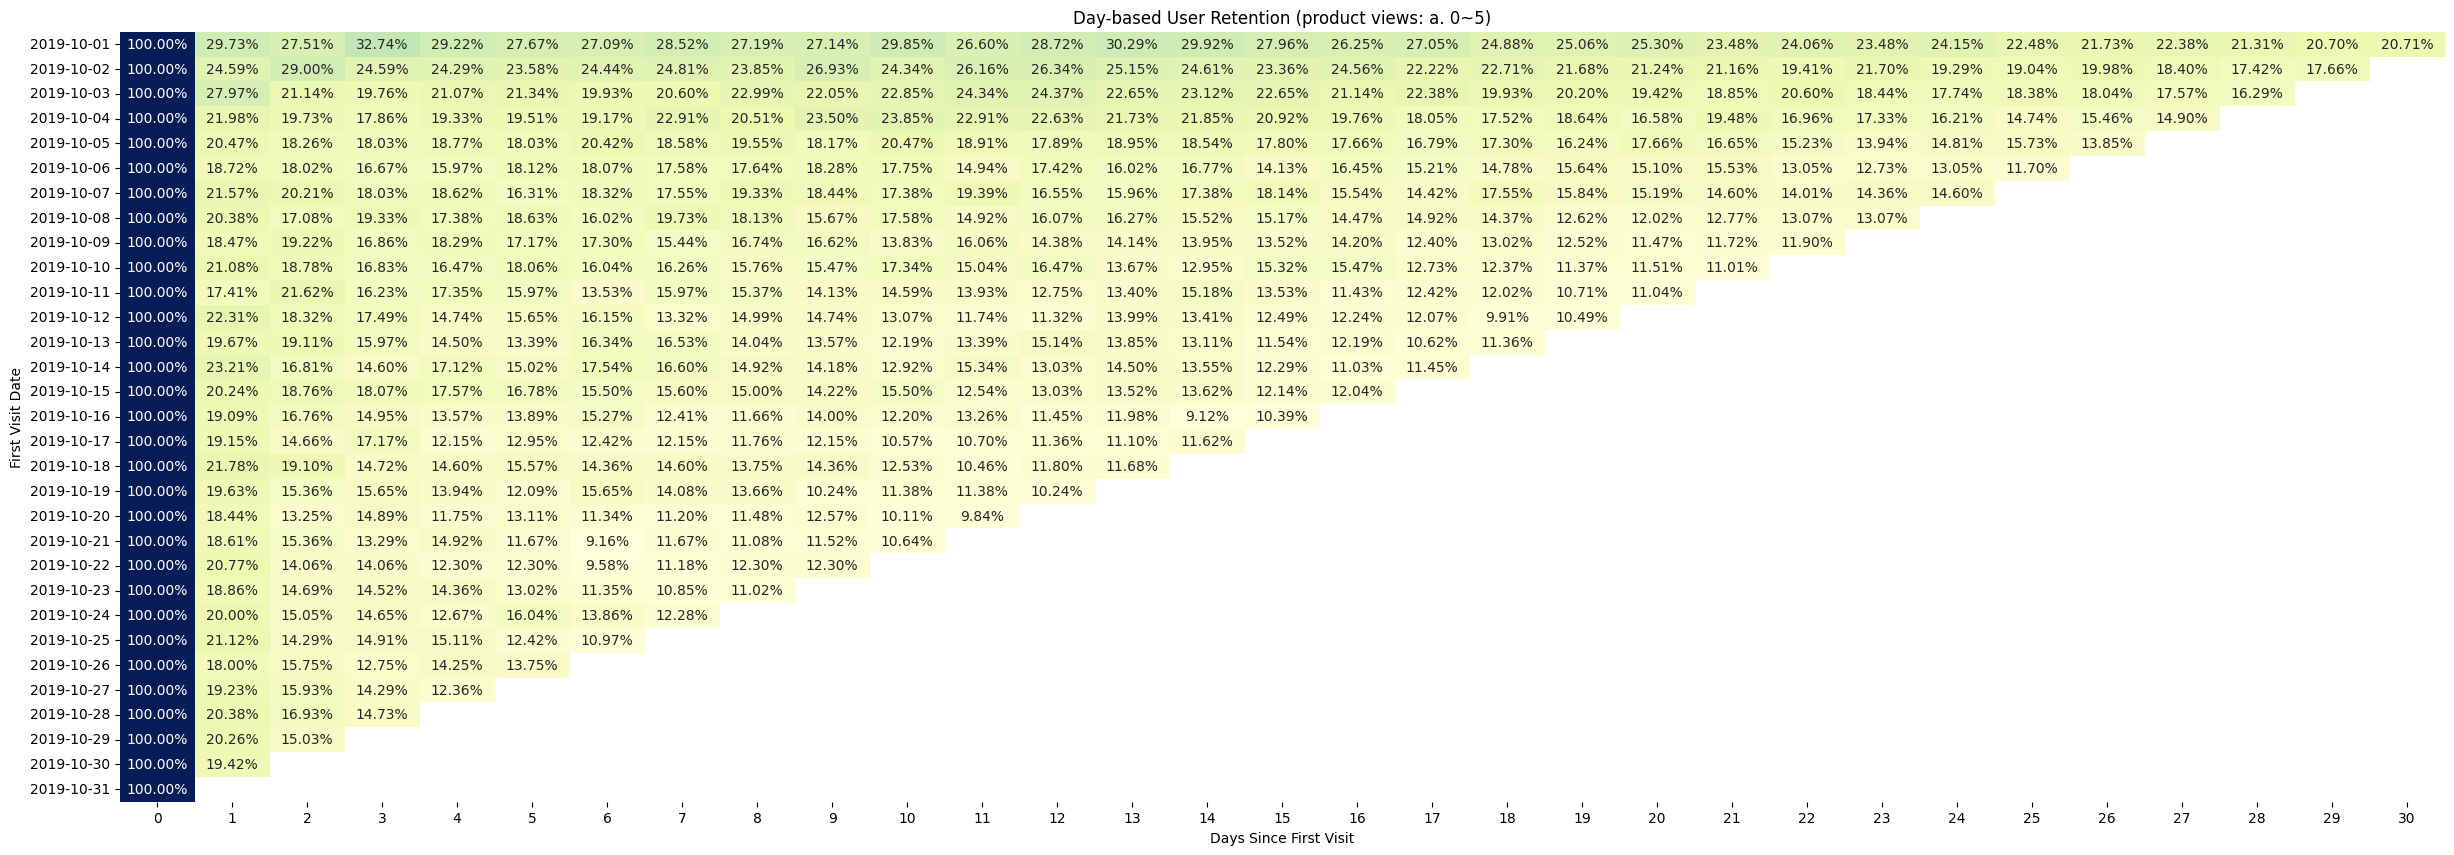

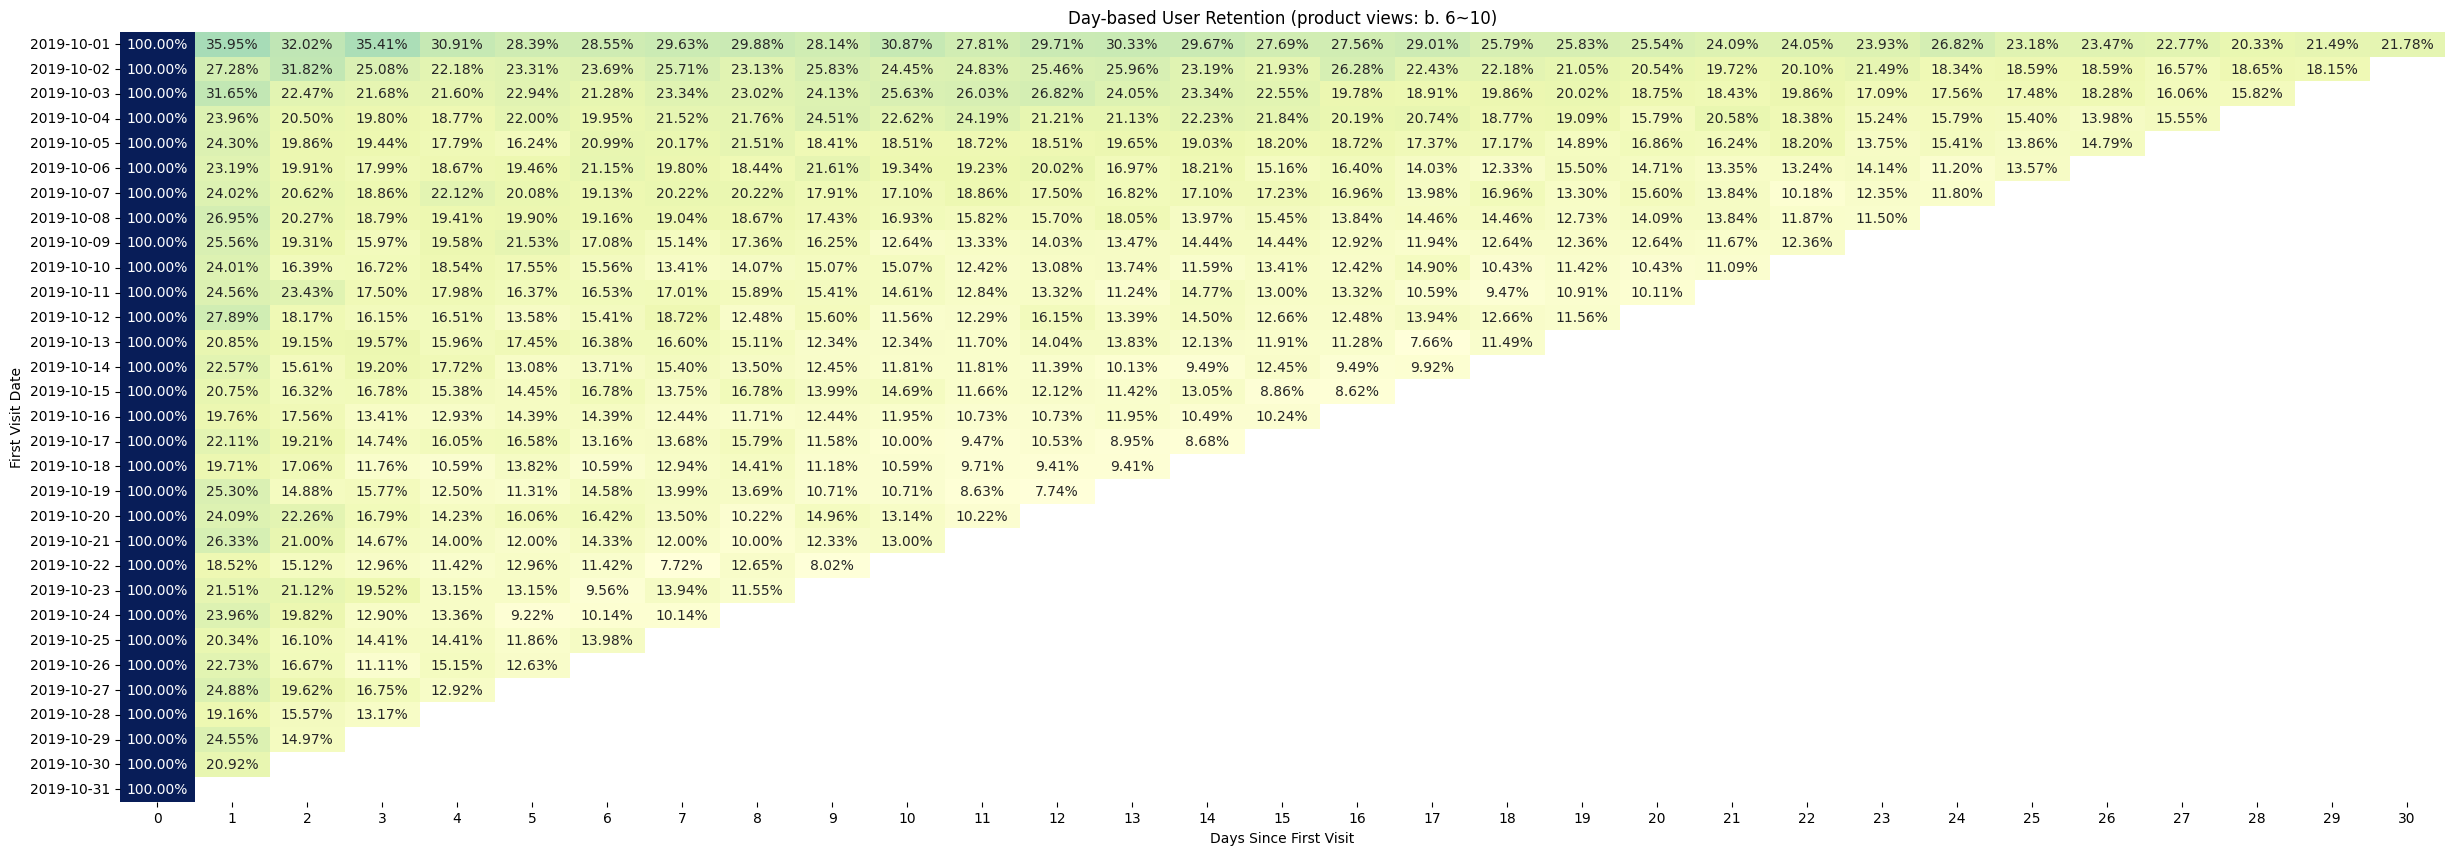

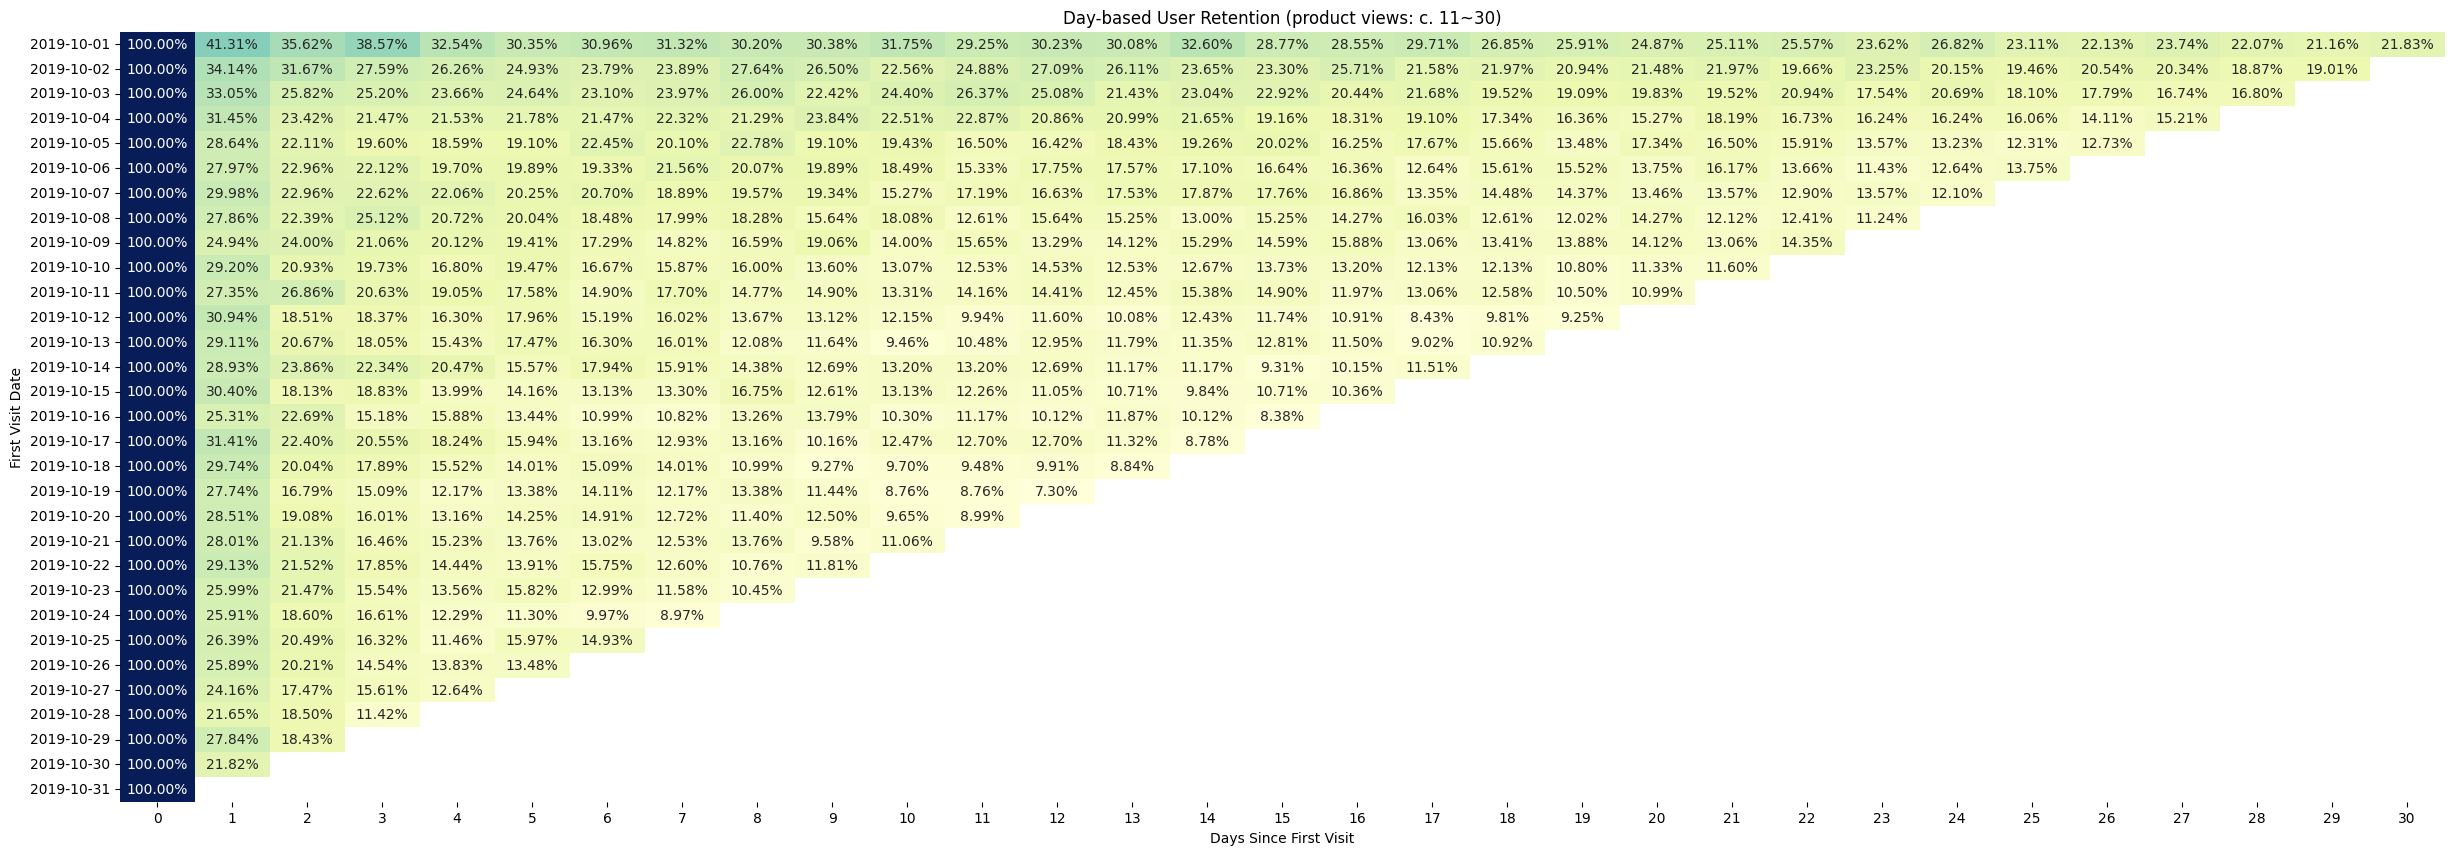

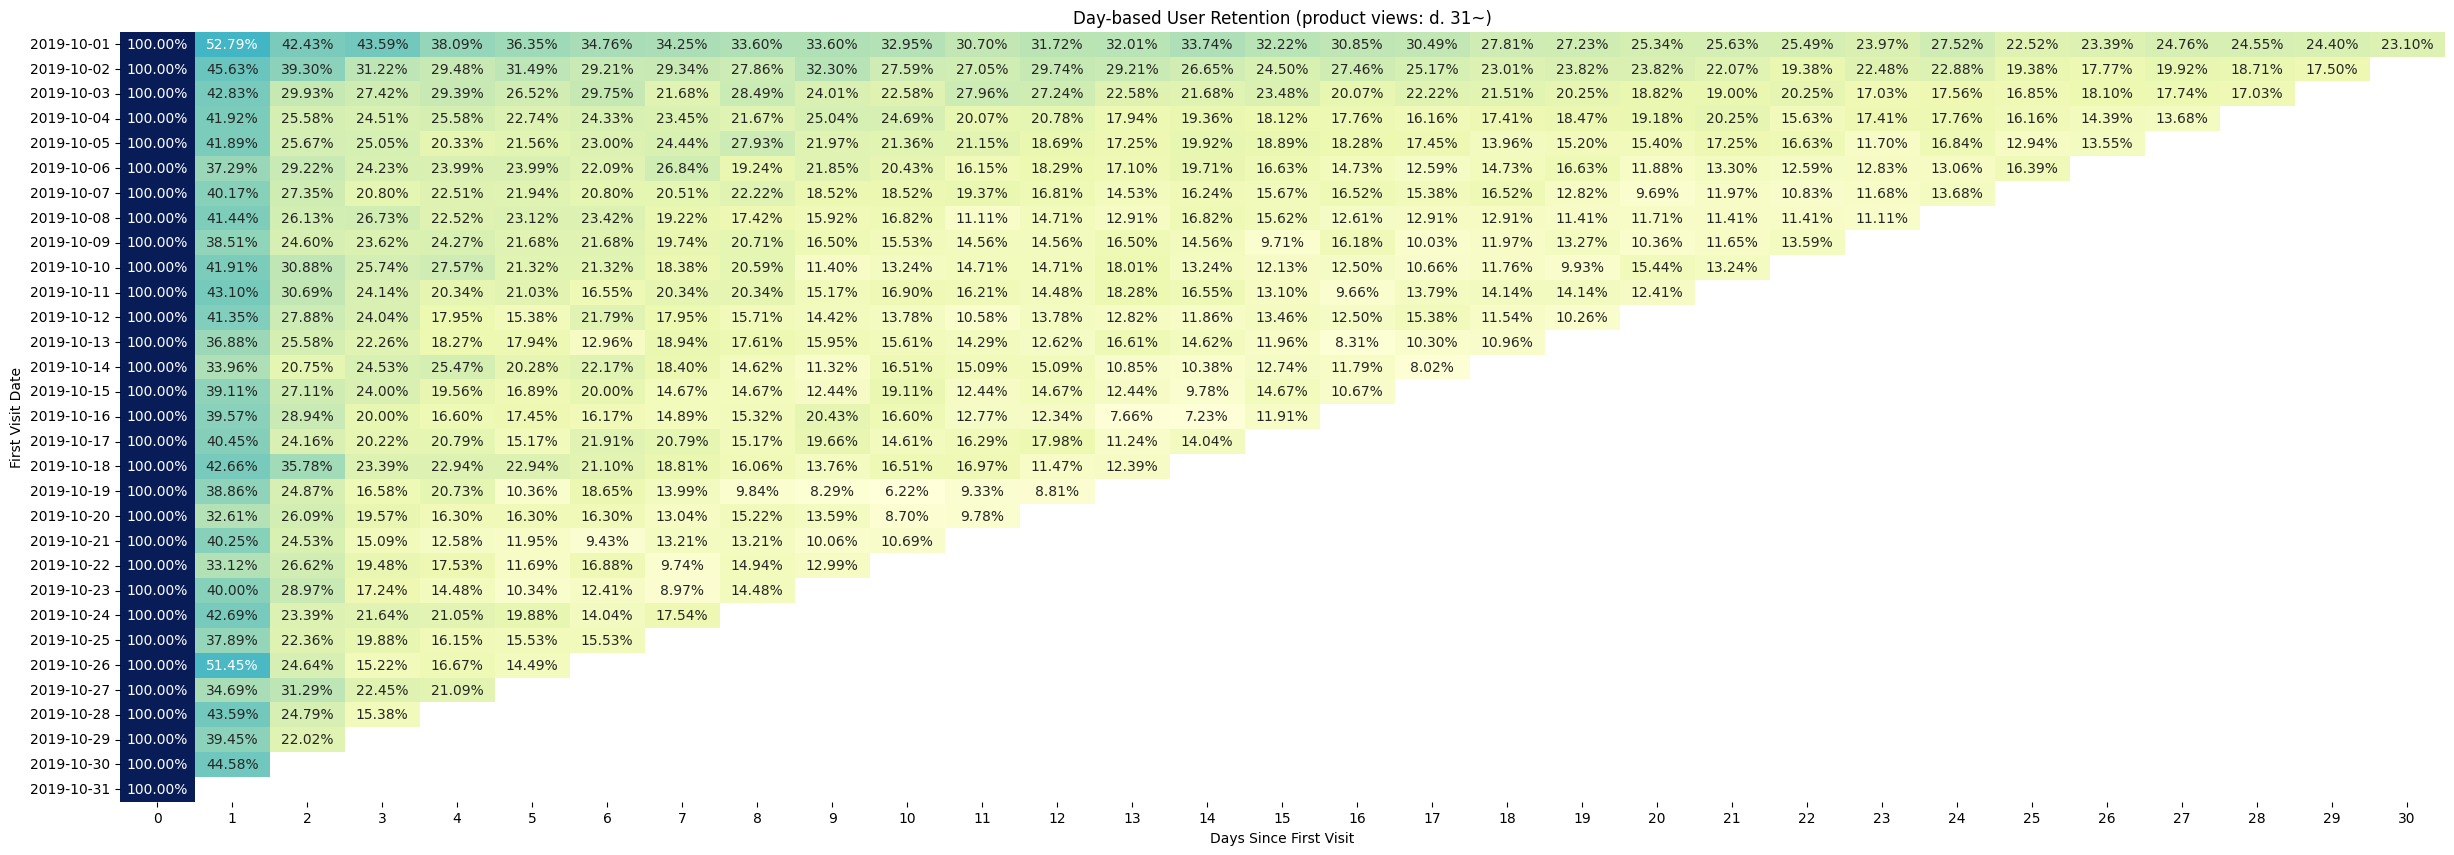

In [33]:
# a그룹, b그룹, c그룹, d그룹 별로 코호트 리텐션 시각화
for views in cohort_retention_pivot.index.levels[0]:
    plt.figure(figsize=(30, 10))
    sns.heatmap(cohort_retention_pivot.loc[views], annot=True, fmt=".2%", cmap="YlGnBu", cbar=False, mask=(retention_pivot == 0))
    plt.title(f"Day-based User Retention (product views: {views})")
    plt.xlabel("Days Since First Visit")
    plt.ylabel("First Visit Date")
    plt.show()

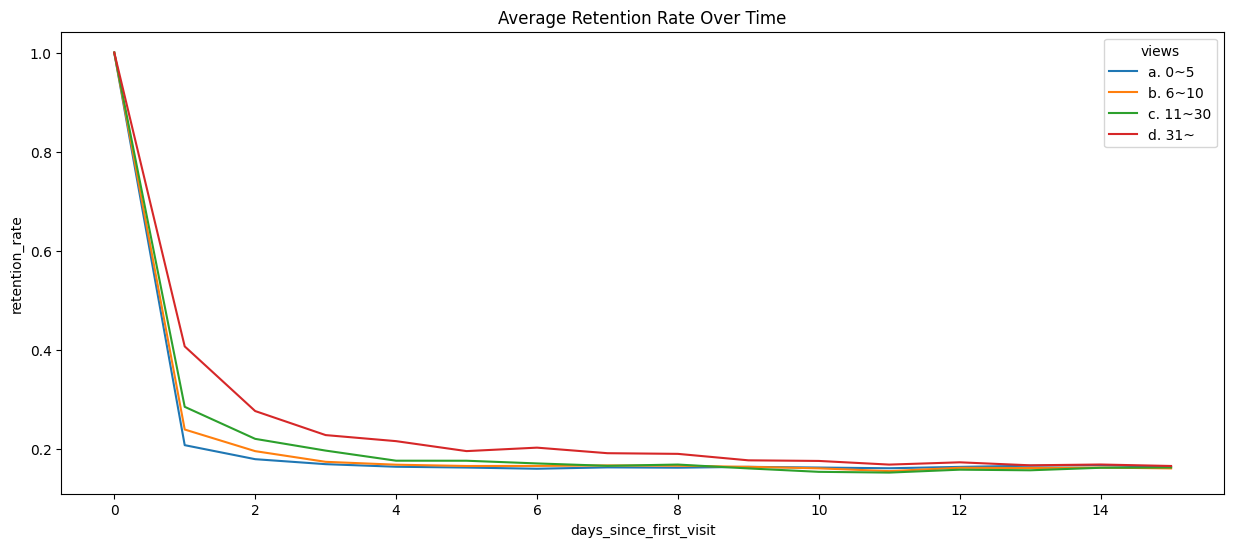

In [34]:
# a그룹, b그룹, c그룹, d그룹 별로 리텐션 커브 시각화
cohort_retention_avg = cohort_retention_rate.query('days_since_first_visit <= 15')\
.groupby(['days_since_first_visit', 'views'])['retention_rate'].mean().reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(x='days_since_first_visit', y='retention_rate', hue='views', data=cohort_retention_avg)
plt.title('Average Retention Rate Over Time')
plt.show()

#### 결론
상품 조회수별로 그룹(a, b, c, d그룹)을 나누어서 리텐션을 그래프로 나타내본 결과,

장기적으로 보면 같은 수치로 수렴하는 것 알 수 있음. (대략 10일 정도 지났을 때 유사한 수치로 수렴)

첫방문일에 상품조회수는, Day1 ~ Day10 까지, 일주일정도 내에 재방문하게끔 하는 데에 중요한 지표고, 이는 장기적 리텐션에까지 영향을 끼치는 요소는 아님.

장기 리텐션에 영향 주는 거 알기 위해서는 다른 분석 적용 필요. 

# 4. 최종 결론


1. GMV에 영향을 주는 KPI는 DAU, 구매전환율이다.
2. view -> cart 까지 넘어가는 비율을 상승 시키는 것이 GMV상승에 도움이 될 것이다.
3. 첫 방문일이 늦을수록, 그리고, 첫 방문 일자 이후 시간이 지날수록 리텐션이 떨어진다.
4. 첫 방문한 날에 다양한 상품을 여러 번 조회할수록, 대략 10일 내외로 높은 리텐션이 유지된다. 